In [1]:
%load_ext autoreload
%autoreload 2


import os,sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

# To manipulate the absorption model we need Xspec support (TBabs model)
os.environ['HEADAS'] = "/home/mnievas/Software/heasoft-6.32.1/INSTALL/x86_64-pc-linux-gnu-libc2.35"

### Custom code
helpers = os.path.abspath('../../Helpers')
if helpers not in sys.path:
    sys.path.append(helpers)
from utils import (
    mkdir_p,
)
from hydrogen import (
    sherpa_xtbabs_model, 
    generate_tbabs_interp_table,
    get_tbabs_template_model,
)

from dustextinction import (
    sherpa_xredden_model, 
    generate_xredden_interp_table,
    get_xredden_template_model,
)

In [2]:
basedir = os.path.abspath("../../")

## Hydrogen absorption

In [11]:
# Generate tbabs 2D array for later interpolation, 
# without requiring to access XSpec models during analys (and therefore HEADAS)
tbabs_file = f'{basedir}/Models/tbabs_tau_factor_vs_nH_energy.ecsv'
if not os.path.exists(tbabs_file):
    generate_tbabs_interp_table(tbabs_file)

abs_model = sherpa_xtbabs_model(srcname='OP313')
interpolated_model_nd = get_tbabs_template_model(tbabs_file,srcname='OP313')

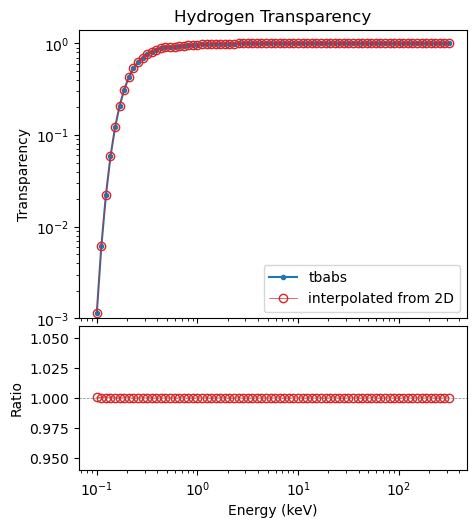

In [17]:
from matplotlib.gridspec import GridSpec

energies = np.logspace(-2,2.5,10*10)*u.keV
energies = energies[energies>=0.1*u.keV]

# Calculate the values
abs_model_values = abs_model(energies)
interp_values = interpolated_model_nd(energies)

# Create the figure and the subplots
fig = plt.figure(figsize=(5, 6))
gs = GridSpec(3, 1, height_ratios=[2, 1, 0.1], hspace=0.05)

# Upper plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(
    energies,
    abs_model_values,
    marker='.', label='tbabs'
)
ax1.plot(
    energies,
    interp_values,
    label='interpolated from 2D', color='tab:red', lw=0.5,
    marker='o', markerfacecolor='None'
)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('Transparency')
ax1.set_ylim(1e-3, 1.4)
ax1.legend()
ax1.set_title('Hydrogen Transparency')

# Lower plot
ax2 = fig.add_subplot(gs[1, 0])
ratio = abs_model_values / interp_values
ax2.plot(
    energies * u.keV,
    ratio, lw=0.5,
    marker='o', markerfacecolor='None',color='tab:red'
)
ax2.axhline(1, color='gray', linestyle='--', lw=0.5)
ax2.set_xscale('log')
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel('Ratio')
ax2.set_ylim(0.94, 1.06)

plt.show()


## Extinction

In [5]:
# Generate redden 2D array for later interpolation, 
# without requiring to access XSpec models during analys (and therefore HEADAS)
redden_file = f'{basedir}/Models/xredden_tau_factor_vs_EBV_energy.ecsv'
if not os.path.exists(redden_file):
    generate_xredden_interp_table(redden_file)
    
interpolated_model_nd = get_xredden_template_model(redden_file,srcname='OP313')

/home/mnievas/anaconda/envs/ciaoxray_devel/lib/python3.11/site-packages/sherpa/astro/xspec/__init__.py:1218: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


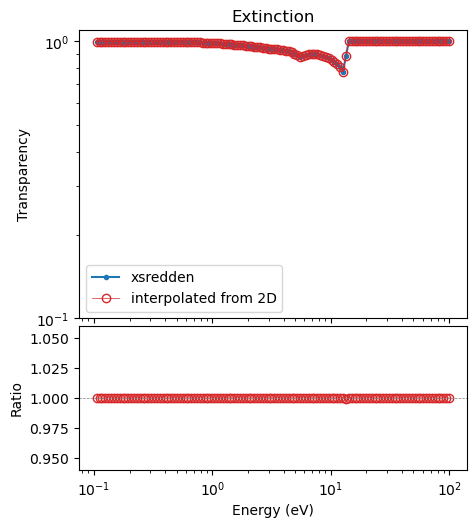

In [6]:
from matplotlib.gridspec import GridSpec

energies = np.logspace(-1,2,5*25)*u.eV
energies = energies[energies>0.1*u.eV]

# Calculate the values
abs_model = sherpa_xredden_model(srcname='OP313')
abs_model_values = abs_model(energies)
interp_values = interpolated_model_nd(energies)

# Create the figure and the subplots
fig = plt.figure(figsize=(5, 6))
gs = GridSpec(3, 1, height_ratios=[2, 1, 0.1], hspace=0.05)

# Upper plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(
    energies,
    abs_model_values,
    marker='.', label='xsredden'
)
ax1.plot(
    energies,
    interp_values,
    label='interpolated from 2D', color='tab:red', lw=0.5,
    marker='o', markerfacecolor='None'
)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('Transparency')
ax1.set_ylim(0.1, 1.1)
ax1.legend()
ax1.set_title('Extinction')

# Lower plot
ax2 = fig.add_subplot(gs[1, 0])
ratio = abs_model_values / interp_values
ax2.plot(
    energies * u.keV,
    ratio, lw=0.5,
    marker='o', markerfacecolor='None',color='tab:red'
)
ax2.axhline(1, color='gray', linestyle='--', lw=0.5)
ax2.set_xscale('log')
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Ratio')
ax2.set_ylim(0.94, 1.06)

plt.show()
